# GeoPandas bug writing and reading GeoJSON files
  
Analyze error and workarounds for using Redistricting Commission shape files
- Error recreation:  
    1. read Colorado SD shapefiles into gpd.DataFrame
    3. write sd's to geojson file
    4. read sd's from geojson file
    5. geojson file cannot be used in Leaflet
    
- Diagnosis:
  - coordinates not long/lat
  - coordinates are northing/easting

  - SD geojson files use urn:ogc:def:crs:EPSG::2232, not compatible with Leaflet display
  - need to convert these files
  - Leaflet's default projection is EPSG:3857, also known as "Google Mercator" or "Web Mercator" and sometimes designated with the number "900913". This projection is what most slippy tile based maps use, including the common tile sets from Google, Bing, OpenStreetMap, and others. You can easily use this projection in QGIS by selecting "Google Mercator EPSG:900913". Leaflet has some basic support for displaying maps in other projections. Most folks who do that seem to use the addon Proj4Leaflet to perform the projection.

- Fix: 
    - After reading shape files:
        1. check CRS - gpd.crs
        2. convert to WGS 84 aka ESPG:4326 - gpd.to_crs(4326)
- Test:
    - output geojson files now work in Leaflet
        - C:\Users\Bruce Norikane\bcdp\field_map_leaflet\field_map.html

- Started: August 26, 2022
- Updated:  


## Test process
- Read statewide SD Shapefile into GeoDataFrame
- Find CRS

- write SD's to GeoJSON file 

```
sds = gpd.read_file('data/sd/2021_Approved_Senate_Plan_w_Final_Adjustments.shp')
sd_boulder.to_file('data/sd_boulder.geojson', driver='GeoJSON')
sd_test_geojson = gpd.read_file('data/sd_boulder.geojson', driver='GeoJSON')

```


In [9]:
import pandas as pd
import geopandas as gpd
import fiona
# allow Fiona KML driver with rw permission
# gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

## Find 
- Read Shape with all Colorado SD's
    - sds = gpd.read_file('data/sd/2021_Approved_Senate_Plan_w_Final_Adjustments.shp')
- Find sds crs

In [10]:
sds = gpd.read_file('data/sd/2021_Approved_Senate_Plan_w_Final_Adjustments.shp')

<AxesSubplot:>

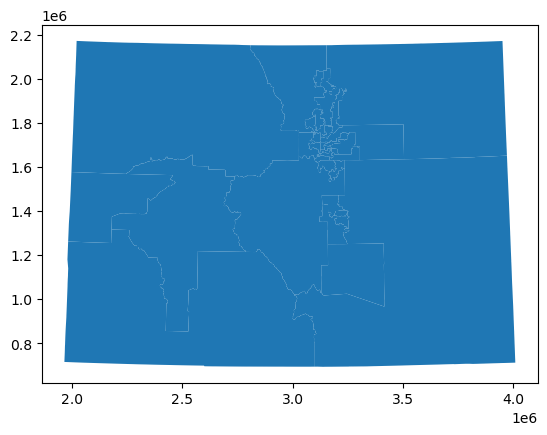

In [11]:
sds.plot()

In [12]:
sds.head()

,OBJECTID,District,Shape_Leng,Shape_Area,geometry
0,1,1,3.080656e+06,3.564080e+11,"MULTIPOLYGON (((3207254.028 1930325.957, 32072..."
1,2,2,5.278787e+05,3.252466e+09,"POLYGON ((3199359.302 1631852.221, 3199775.126..."
2,3,3,1.099216e+06,6.685520e+10,"POLYGON ((3408101.036 1254173.307, 3408401.093..."
3,4,4,2.995556e+06,2.069199e+11,"POLYGON ((3093558.228 1654047.998, 3093814.205..."
4,5,5,3.619013e+06,2.167483e+11,"POLYGON ((2545420.289 1656281.505, 2545327.690..."


In [13]:
sds.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    35 non-null     int64   
 1   District    35 non-null     int64   
 2   Shape_Leng  35 non-null     float64 
 3   Shape_Area  35 non-null     float64 
 4   geometry    35 non-null     geometry
dtypes: float64(2), geometry(1), int64(2)
memory usage: 1.5 KB


In [14]:
sds.crs

<Derived Projected CRS: EPSG:2232>
Name: NAD83 / Colorado Central (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Colorado - counties Arapahoe; Chaffee; Cheyenne; Clear Creek; Delta; Denver; Douglas; Eagle; El Paso; Elbert; Fremont; Garfield; Gunnison; Jefferson; Kit Carson; Lake; Lincoln; Mesa; Park; Pitkin; Summit; Teller.
- bounds: (-109.06, 38.14, -102.04, 40.09)
Coordinate Operation:
- name: SPCS83 Colorado Central zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [16]:
sds.to_crs(4326, inplace=True)

In [17]:
# test writing then reading geojson
sds.to_file('data/sd_test_crs.geojson', driver='GeoJSON')

In [18]:
# read Boulder only sd's from geojson file
sd_read_crs = gpd.read_file('data/sd_test_crs.geojson', driver='GeoJSON')

<AxesSubplot:>

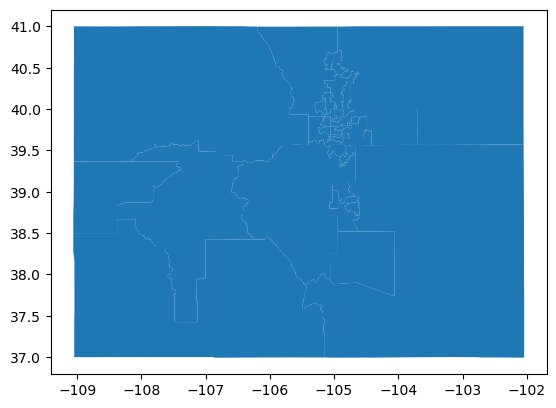

In [19]:
# sd_read_boulder_geojson.plot(aspect='equal')
sd_read_crs.plot()

In [20]:
sd_read_crs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich